## Data

Nous disposons d'un ensemble de données de 17092 images de cellules normales du sang préphérique, les images sont répartis sur 8 classes de types distincts à savoir : 'basophil','eosinophil', 'erythroblast', 'immature granulocytes', 'lymphocyte', 'monocyte', 'neutrophil' et 'platelet'.

Dans ce notebook on va éffectué un audit général de nos images et quelques visualisation.  

## 1. Charger les données

In [ ]:
import pandas as pd
import numpy as np
from termcolor import colored
import random

import glob
import os

import cv2 ## Package pour lire nos images
from PIL import Image ## Importer ce package pour pouvoir voir le format de l'image

import matplotlib.pyplot as plt
%matplotlib inline

## Chemin pour aller récupérer les images stocker dans le dossier 'PBC_dataset_normal_DIB'
path ="C:/Users/HP/Desktop/Projets Data Sciences/20211121-Projet_Deep Learning_Blood_Cell/1."+\
                                               "Prepared Data/PBC_dataset_normal_DIB/PBC_dataset_normal_DIB/"

## Créer une liste où stocker les noms des images de nos 8 différentes classes
Classes = []
for element in os.listdir(path):
    img = os.listdir(path+element)
    Classes.append(img)


# importer toutes les images des 8 différentes classes et les stocker dans un array images
images = []
for element in os.listdir(path) :
    for img in glob.glob(path+element+'/'+'*.jpg'): 
        imge = cv2.imread(img)
        images.append(imge)


FileNotFoundError: ignored

## 2. Audit

### 2.1. Regarder la répartitions de nos données sur les 8 classes 

In [ ]:
# Afficher la taille de nos classes et le pourcentage de chacune d'entre elle dans un DataFrame
type_cellule=['basophil','eosinophil', 'erythroblast','immature granulocytes','lymphocyte','monocyte','neutrophil',
              'platelet']
Total_Number = []
Percentage = []
for i, Classe in zip(range(len(Classes)),type_cellule):
    Total_Number.append(len(Classes[i]))
    Percentage.append(round(len(Classes[i])/17092 *100,2))

dictionnaire = {'Type de Cellule': [i for i in type_cellule],
                'Total' : [j for j in Total_Number],
                '%' : [perc for perc in Percentage]
                 }

DF = pd.DataFrame(data = dictionnaire, columns=dictionnaire.keys())

import seaborn as sns
sns.set_theme(style="whitegrid")

g = sns.catplot(y='Type de Cellule',x='Total_images',hue='Type de Cellule' ,data=DF,kind='bar',dodge=False,height=8)
g.fig.set_figwidth(12)
g.fig.set_figheight(6)
g.set_yticklabels(["BA", "EO", "ER","IG","LY","MO","NEU","PLT"])
#plt.legend(labels = [name for name in type_cellule],loc='center right',bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlabel("Nombre d'images",size=14)
plt.ylabel("Type de Cellule",size=14);


,Type de Cellule,Total,%
0,basophil,1218,7.13
1,eosinophil,3117,18.24
2,erythroblast,1551,9.07
3,immature granulocytes,2895,16.94
4,lymphocyte,1214,7.10
5,monocyte,1420,8.31
6,neutrophil,3330,19.48
7,platelet,2348,13.74


In [2]:
from google.colab import drive
#drive.mount('/content/drive')
import os
os.listdir()

['.config', 'sample_data']

In [ ]:
# Taille de nos images
for img in images :
    h, w, c = img.shape # on peut utiliser également size qui nous renvois (h*w*c)
    print("height  :", h)
    print("width   :", w)
    print("channel :", c)

# Si jamais dans nos données on a des images avec des tailles différentes des autres, récupérer le nom des images et le 
# stocker dans une liste !
img_other_size = []    
for element, Classe in zip(os.listdir(path),Classes) :
    for img, imge in zip(glob.glob(path+element+'/'+'*.jpg'), Classe) : 
        if cv2.imread(img).shape != (363,360,3) :
            img_other_size.append(imge)


height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3


In [ ]:
print(colored(len(img_other_size),attrs=['bold']),"images possèdent une taille différente de la taille des autres images !")

453 images possèdent une taille différente de la taille des autres images !


In [ ]:
## format de nos images
for element in os.listdir(path) :
    for img in glob.glob(path+element+'/'+'*.jpg'): 
        print(Image.open(img).format) 


# Si il y'a des images avec un format différent des autres images, on va les récupérer et ensuite les stocker dans la liste
# img_other_format        
img_other_format = []

for element, Classe in zip(os.listdir(path),Classes) :
    for img, imge in zip(glob.glob(path+element+'/'+'*.jpg'), Classe) : 
        if Image.open(img).format != 'JPEG' :
            img_other_format.append(imge)

JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG
JPEG


In [ ]:
if not(img_other_format) :
    print(colored("toutes nos images ont le même format !",attrs=['bold']))
else :
   img_other_format

toutes nos images ont le même format !


### 2.2. Visalisation des différents classes de cellules

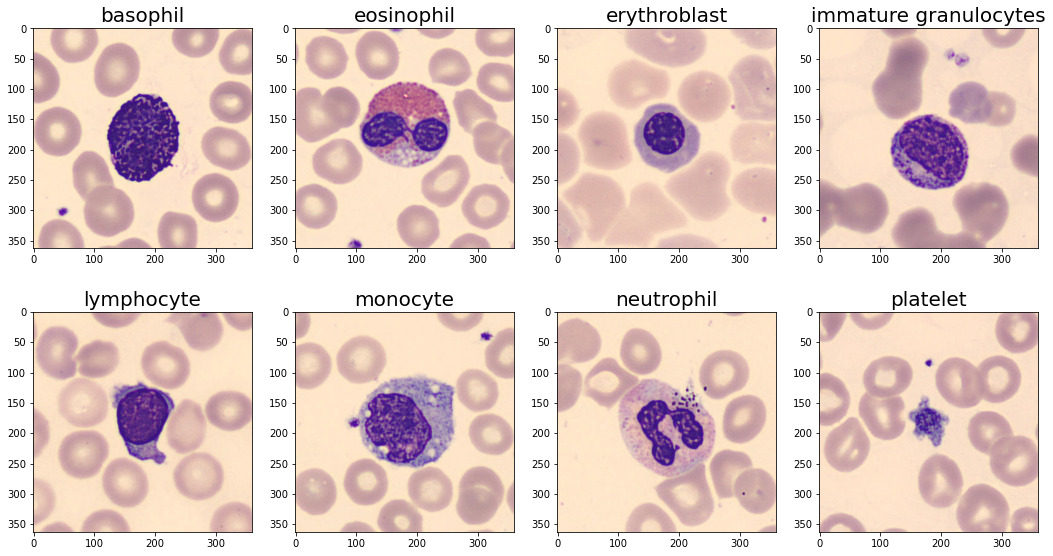

In [ ]:
#------- Afficher pour chaque type de cellules une image, qu'on récupére du manière aléatoire ---------#
# selectionner une cellule de chaque type de classe et les visualiser avec plt.imshow

img_random = []
classe_BA = Classes[0]
for imge in classe_BA :
    img_BA = random.choice(classe_BA)
img_random.append(img_BA)
    
classe_EO = Classes[1]
for imge in classe_EO :
    img_EO = random.choice(classe_EO)
img_random.append(img_EO)

classe_ERB = Classes[2]
for imge in classe_ERB :
    img_ERB = random.choice(classe_ERB)
img_random.append(img_ERB)

classe_IG = Classes[3]
for imge in classe_IG :
    img_IG = random.choice(classe_IG)
img_random.append(img_IG)

classe_LY = Classes[4]
for imge in classe_LY :
    img_LY = random.choice(classe_LY)
img_random.append(img_LY)

classe_MO = Classes[5]
for imge in classe_MO :
    img_MO = random.choice(classe_MO)
img_random.append(img_MO)

classe_BNE = Classes[6]
for imge in classe_BNE :
    img_BNE = random.choice(classe_BNE)
img_random.append(img_BNE)

classe_PLQ = Classes[7]
for imge in classe_PLQ :
    img_PLQ = random.choice(classe_PLQ)
img_random.append(img_PLQ)

noms_classe = ['basophil','eosinophil','erythroblast','immature granulocytes','lymphocyte','monocyte','neutrophil',
               'platelet']
fig= plt.figure(figsize=(18,20))   
for i in range(8):        
    # subplots
    plt.subplot(4, 4, i+1)   
    # Afficher l'image
    plt.imshow(cv2.cvtColor(cv2.imread(path+os.listdir(path)[i]+'/'+img_random[i],cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB));  
    # set the title to subplots
    plt.gca().set_title(noms_classe[i],size=20) ;

### 2.3. Etude des contours avec la méthode Canny

In [ ]:
from skimage import feature

# Lire les images afficher la dessus 
imge_array = []
M = []
for i in range(len(img_random)) :
    imge = cv2.imread(path+os.listdir(path)[i]+'/'+img_random[i],cv2.IMREAD_COLOR)
    m = np.zeros((imge.shape[0],imge.shape[1]))
    m[:,:] = imge[:,:,0]
    imge_array.append(imge)
    M.append(m)

#---------- Appliquer le filtre Canny  ----------#

edges = []
for i in range(len(imge_array)):
    edges.append(feature.canny(M[i], sigma=3)) # On peut jouer sur les valeur de sigma afin de voir 

fig = plt.figure(figsize=(18,20))   
for i in range(len(imge_array)) :        
    # subplots
    plt.subplot(4, 4, i+1)   
    # Afficher l'image
    plt.imshow(edges[i], cmap=plt.cm.gray, interpolation='nearest');  
    # set the title to subplots
    plt.gca().set_title(noms_classe[i],size=20) ;

NameError: ignored

### 2.4. Histogramme des pixels

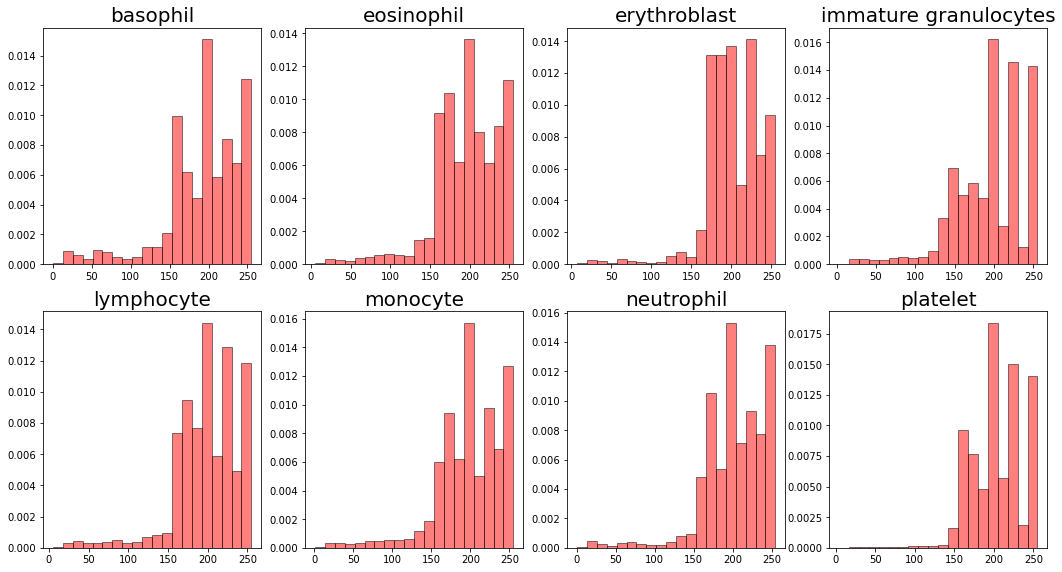

In [ ]:
fig = plt.figure(figsize=(18,20))   
for i in range(len(imge_array)) :        
    # subplots
    plt.subplot(4, 4, i+1)   
    # Afficher l'image
    plt.hist(imge_array[i].flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red');  
    # set the title to subplots
    plt.gca().set_title(noms_classe[i],size=20) ;